<a href="https://colab.research.google.com/github/julika333/TMS-DS/blob/main/TMS_nb/AutoEncoder_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:

from keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0



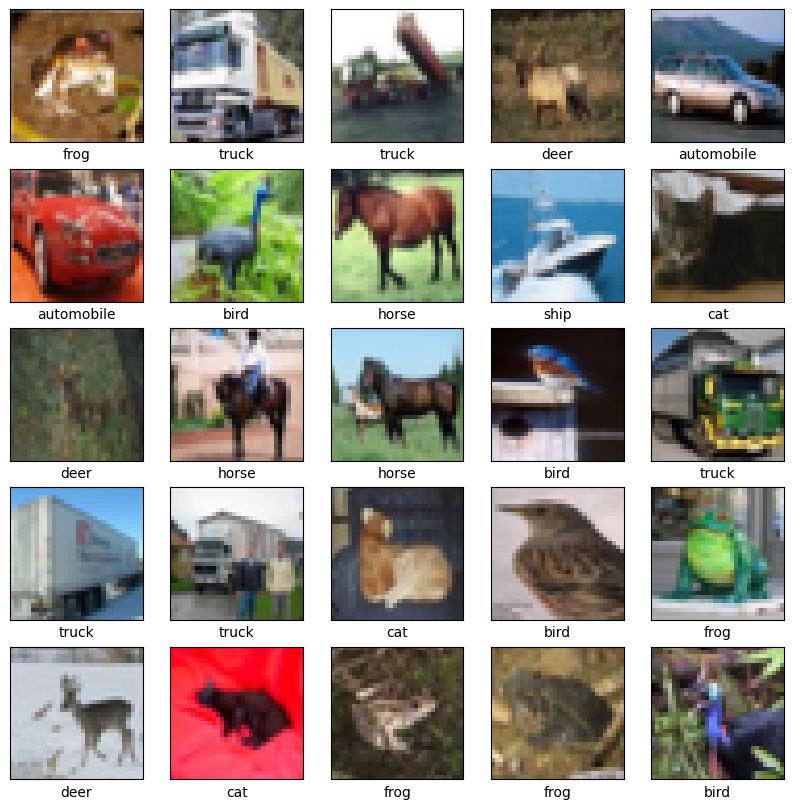

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
from keras import losses
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))



Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5611 - accuracy: 0.4312 - val_loss: 1.2473 - val_accuracy: 0.5503
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1705 - accuracy: 0.5873 - val_loss: 1.0978 - val_accuracy: 0.6055
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0232 - accuracy: 0.6398 - val_loss: 1.0336 - val_accuracy: 0.6345
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9216 - accuracy: 0.6755 - val_loss: 0.9300 - val_accuracy: 0.6763
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8551 - accuracy: 0.6988 - val_loss: 0.9145 - val_accuracy: 0.6851
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7934 - accuracy: 0.7203 - val_loss: 0.8987 - val_accuracy: 0.6871
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7456 - accuracy: 0.7383 - val_loss: 0.8737 -

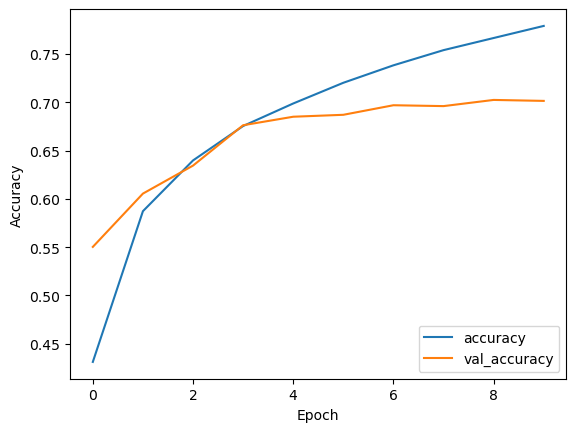

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(x_test,  test_labels, verbose=2)



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# # Загрузка данных (пример с MNIST)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.CIFAR10('data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# # Задаем размерность входных данных
input_dim = 32 * 32 * 3
# # Задаем размерность латентного представления
latent_dim = 512

# # Создаем класс для автоэнкодера
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, latent_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# # Создаем экземпляр модели
autoencoder = Autoencoder()

# # Определяем функцию потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# # Обучение модели
for epoch in range(10):
    for data, _ in train_loader:  # Используем загруженные данные и их метки
        optimizer.zero_grad()
        data = data.view(-1, input_dim)  # Преобразуем данные в нужный формат
        outputs = autoencoder(data)
        loss = criterion(outputs, data)
        loss.backward()
        optimizer.step()

# # Проверка качества на тестовом наборе
test_dataset = datasets.CIFAR10('data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
test_loss = 0
with torch.no_grad():
    for data, _ in test_loader:  # Используем загруженные данные и их метки
        data = data.view(-1, input_dim)  # Преобразуем данные в нужный формат
        outputs = autoencoder(data)
        loss = criterion(outputs, data)
        test_loss += loss.item() * data.size(0)

test_loss /= len(test_loader.dataset)
print('Test loss:', test_loss)

100%|██████████████████████████████████████████████████████████████| 170498071/170498071 [00:15<00:00, 10735300.70it/s]


Extracting data\cifar-10-python.tar.gz to data
Files already downloaded and verified
Test loss: 0.14602060284614563


Original Images


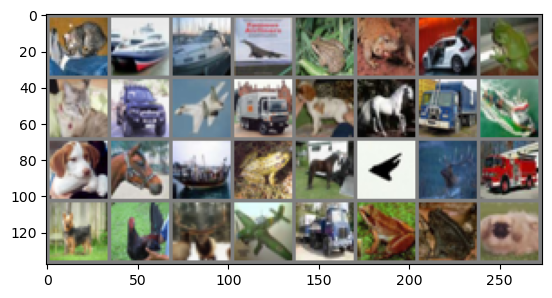

Reconstructed Images


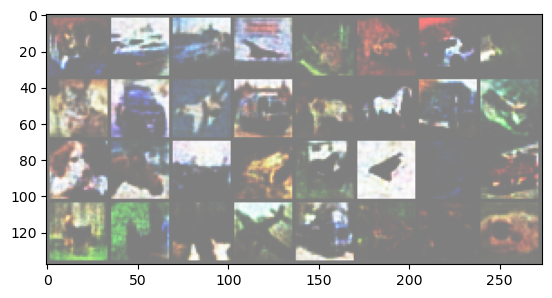

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Функция для отображения изображений
def imshow(img):
    img = img / 2 + 0.5  # Денормализация
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Получим один пакет тестовых данных
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Покажем оригинальные изображения
print("Original Images")
imshow(torchvision.utils.make_grid(images))

# Преобразуем данные в нужный формат и проходим через автоэнкодер
images = images.view(-1, input_dim)
outputs = autoencoder(images)
outputs = outputs.view(-1, 3, 32, 32)  # Преобразуем обратно в формат изображений

# Покажем реконструированные изображения
print("Reconstructed Images")
imshow(torchvision.utils.make_grid(outputs))